## Dados

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url_1 = r'home/vinicius/Documentos/Repositorios/Machine-Learning-Braco-Robotico/Treinamento/dados_dd1.xlsx'
url_2 = r'home/vinicius/Documentos/Repositorios/Machine-Learning-Braco-Robotico/Treinamento/dados_dd2.xlsx'
url_3 = r'home/vinicius/Documentos/Repositorios/Machine-Learning-Braco-Robotico/Treinamento/dados_dd3.xlsx'
url_4 = r'home/vinicius/Documentos/Repositorios/Machine-Learning-Braco-Robotico/Treinamento/dados_dd4.xlsx'

dados_1 = pd.read_excel(url_1)
dados_2 = pd.read_excel(url_2)
dados_3 = pd.read_excel(url_3)
dados_4 = pd.read_excel(url_4)


print(f"Dados 1 - {dados_1.shape}")
print(f"Dados 2 - {dados_2.shape}")
print(f"Dados 3 - {dados_3.shape}")
print(f"Dados 4 - {dados_4.shape}")

# Use a função concat para combiná-los verticalmente (por padrão, axis=0)
dados= pd.concat([dados_1, dados_2, dados_3, dados_4])
dados= dados.reset_index(drop=True)
linhas_com_todos_nulos = dados[dados.isnull().all(axis=1)]
dados= dados.dropna(how='any')

# Use o método duplicated() para encontrar linhas duplicadas
linhas_duplicadas = dados[dados.duplicated()]
dados = dados.drop_duplicates()

print(f"Dados - {dados.shape}")

: 

In [3]:
dados.describe()

,Amplitude_degrau,Tempo_degrau,Kp,Ti,Td,b,c,Tf,RiseTime,SettlingTime,Overshoot,Undershoot
count,100000.000000,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,908.961630,0.0,0.500420,0.500669,0.500520,0.499443,0.500960,0.499239,0.796131,9.478996,17.299593,44.343748
std,514.541655,0.0,0.288063,0.287952,0.289143,0.288844,0.289094,0.288206,1.011728,1.473346,1237.119939,612.966810
min,20.019641,0.0,0.000017,0.000020,0.000016,0.000003,0.000009,0.000018,0.000094,2.474605,0.000000,0.000000
25%,462.369193,0.0,0.250784,0.251128,0.250019,0.249017,0.250214,0.249425,0.139607,9.996488,0.000000,13.246690
50%,908.954386,0.0,0.499756,0.501520,0.500057,0.500018,0.500008,0.499666,0.451108,9.996963,0.000000,31.349324
75%,1355.918643,0.0,0.749388,0.749172,0.751116,0.748364,0.751736,0.747750,0.851437,9.997364,0.000000,51.230323
max,1799.981900,0.0,1.000000,0.999977,0.999995,0.999994,0.999998,0.999994,9.935480,9.999999,361802.394288,169631.958159


In [ ]:
from scipy import stats

z_scores = stats.zscore(dados)
outliers = (z_scores > 3) | (z_scores < -3)
dados = dados[~outliers]
dados= dados.dropna(how='any')

print(f"Dados - {dados.shape}")

Dados - (92483, 12)


In [5]:
dados.describe()

,Amplitude_degrau,Tempo_degrau,Kp,Ti,Td,b,c,Tf,RiseTime,SettlingTime,Overshoot,Undershoot
count,92483.000000,92483.0,92483.000000,92483.000000,92483.000000,92483.000000,92483.000000,92483.000000,92483.000000,92483.000000,92483.000000,92483.000000
mean,908.470885,0.0,0.529934,0.497626,0.506644,0.499385,0.501241,0.495066,0.677271,9.775626,8.495531,39.106572
std,514.338619,0.0,0.278521,0.288266,0.288317,0.288953,0.289044,0.288327,0.740088,0.830595,71.004491,53.294155
min,20.019641,0.0,0.000565,0.000020,0.000016,0.000003,0.000009,0.000018,0.005853,5.059193,0.000000,0.000000
25%,462.562143,0.0,0.305366,0.247597,0.258462,0.248290,0.250490,0.244688,0.137601,9.996624,0.000000,18.021906
50%,908.150987,0.0,0.537694,0.497173,0.509323,0.499808,0.500473,0.493854,0.443373,9.997008,0.000000,33.320494
75%,1354.892803,0.0,0.768231,0.745786,0.757024,0.748673,0.751948,0.742688,0.832441,9.997385,0.000000,52.407916
max,1799.981900,0.0,1.000000,0.999977,0.999995,0.999994,0.999998,0.999994,3.831060,9.999892,3686.758038,1860.648413


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92483 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Amplitude_degrau  92483 non-null  float64
 1   Tempo_degrau      92483 non-null  int64  
 2   Kp                92483 non-null  float64
 3   Ti                92483 non-null  float64
 4   Td                92483 non-null  float64
 5   b                 92483 non-null  float64
 6   c                 92483 non-null  float64
 7   Tf                92483 non-null  float64
 8   RiseTime          92483 non-null  float64
 9   SettlingTime      92483 non-null  float64
 10  Overshoot         92483 non-null  float64
 11  Undershoot        92483 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 9.2 MB


<Axes: >

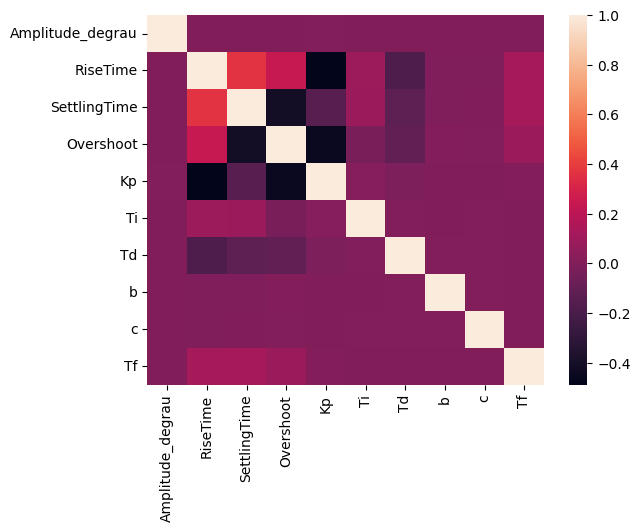

In [ ]:
colunas_entrada = ['Amplitude_degrau', 'RiseTime', 'SettlingTime', 'Overshoot', 'Kp', 'Ti', 'Td', 'b', 'c', 'Tf']
dados_novo = dados[colunas_entrada]

correlacoes = dados_novo.corr(method='kendall')

plt.figure()
sns.heatmap(correlacoes, annot=False)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecionar as colunas de entrada
colunas_entrada = ['Amplitude_degrau', 'RiseTime', 'SettlingTime', 'Overshoot']
x = dados[colunas_entrada]

# Selecionar as colunas de saída
colunas_saida = ['Kp', 'Ti', 'Td', 'b', 'c', 'Tf']
y = dados[colunas_saida]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=58)

# Criar objetos de MinMaxScaler para cada conjunto
scaler = StandardScaler()

# Ajustar e transformar os conjuntos de treinamento, validação e teste
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.fit_transform(x_test)

print(f"Dados Treinamento - {x_train.shape}\nDados Teste - {x_test.shape}\n ")

Dados Treinamento - (69362, 4)
Dados Teste - (23121, 4)
 


## Treinamentos

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import *
from keras.callbacks import EarlyStopping
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from sklearn.tree import DecisionTreeRegressor  # Importe o regressor de Árvore de Decisão
from sklearn.ensemble import BaggingRegressor

In [10]:
# Defina o modelo MLP
mlp_1 = Sequential()
mlp_1.add(Dense(units=256, input_shape=[4], activation=LeakyReLU(alpha=0.1393)))
mlp_1.add(Dense(units=25, activation=LeakyReLU(alpha=0.01)))
mlp_1.add(Dense(units=256, activation=LeakyReLU(alpha=0.01)))
mlp_1.add(Dense(units=6, activation='linear'))

# Compile o modelo MLP com otimizador, função de perda e métricas apropriados
mlp_1.compile(optimizer=Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.6263), loss='mean_squared_error', metrics=['mean_squared_error'])

# Adicione um callback de parada antecipada para monitorar a perda de validação
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Treine o modelo MLP
history = mlp_1.fit(x_train_normalized, y_train, epochs=300, batch_size=128, callbacks=[early_stopping], validation_split=0.25, verbose=False)

In [11]:
# Defina o modelo MLP
mlp_2 = Sequential()
mlp_2.add(Dense(units=256, input_shape=[4], activation=LeakyReLU(alpha=0.01)))
mlp_2.add(Dense(units=256, activation=LeakyReLU(alpha=0.01)))
mlp_2.add(Dense(units=256, activation=LeakyReLU(alpha=1.0)))
mlp_2.add(Dense(units=6, activation='linear'))

# Compile o modelo MLP com otimizador, função de perda e métricas apropriados
mlp_2.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.45, beta_2=0.5), loss='mean_squared_error', metrics=['mean_squared_error'])

# Adicione um callback de parada antecipada para monitorar a perda de validação
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Treine o modelo MLP
history = mlp_2.fit(x_train_normalized, y_train, epochs=300, batch_size=128, callbacks=[early_stopping], validation_split=0.25, verbose=False)

In [12]:
# Crie e treine o modelo ExtraTreesRegressor
extraTreesRegressor_1 = ExtraTreesRegressor(n_estimators=1000, max_depth=64, min_samples_split=20, min_samples_leaf=1, max_features=0.8455, random_state=42)
extraTreesRegressor_1.fit(x_train_normalized, y_train)

KeyboardInterrupt: ignored

In [ ]:
# Crie e treine o modelo ExtraTreesRegressor
extraTreesRegressor_2 = ExtraTreesRegressor(n_estimators=2000, max_depth=128, min_samples_split=40, min_samples_leaf=1, max_features=0.8461, random_state=42)
extraTreesRegressor_2.fit(x_train_normalized, y_train)

In [ ]:
# Hiperparâmetros da Árvore de Decisão
max_depth = 64
min_samples_split = 20
min_samples_leaf = 1

# Crie o modelo de Árvore de Decisão
base_model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

# Hiperparâmetros do Bagging Regressor (mantidos os mesmos)
n_estimators = 500
max_samples = 1.0
bootstrap = True
random_state = 42

# Resto do código é igual
baggingRegressor_1 = BaggingRegressor(base_model, n_estimators=n_estimators, max_samples=max_samples, bootstrap=bootstrap, random_state=random_state)

# Treine o modelo
baggingRegressor_1.fit(x_train_normalized, y_train)

In [ ]:
# Hiperparâmetros da Árvore de Decisão
max_depth = 64
min_samples_split = 20
min_samples_leaf = 1

# Crie o modelo de Árvore de Decisão
base_model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

# Hiperparâmetros do Bagging Regressor (mantidos os mesmos)
n_estimators = 1000
max_samples = 0.8
bootstrap = True
random_state = 42

# Resto do código é igual
baggingRegressor_2 = BaggingRegressor(base_model, n_estimators=n_estimators, max_samples=max_samples, bootstrap=bootstrap, random_state=random_state)

# Treine o modelo
baggingRegressor_2.fit(x_train_normalized, y_train)

## Validações

In [ ]:
DL_1 = mlp_1.predict(x_test_normalized)
y_pred = DL_1

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Suponha que você tem uma nova linha de entrada não normalizada que deseja prever
new_input = pd.DataFrame({
    'Amplitude_degrau': [200],
    'RiseTime': [0.1342],
    'SettlingTime': [0.9947],
    'Overshoot': [15.26]
})

# Pré-processamento da linha de entrada (aplique a mesma normalização)
new_input_normalized = scaler.transform(new_input)  # Use o mesmo scaler que foi usado para normalizar os dados de treinamento

# Faça a previsão
predicted_output = mlp_1.predict(new_input_normalized)  # Realiza a previsão com a RNA treinada

# Crie um DataFrame com rótulos de coluna
predicted_df = pd.DataFrame(predicted_output, columns=colunas_saida)  # "colunas_saida" é uma lista de nomes de colunas de saída

# Exiba o DataFrame com os valores previstos
print('MLP - 1:')
print('---------------------------')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared (R2): {r2}')
print('---------------------------')
print("Valores Preditos:")
print(predicted_df)

In [ ]:
DL_2 = mlp_2.predict(x_test_normalized)
y_pred = DL_2

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Suponha que você tem uma nova linha de entrada não normalizada que deseja prever
new_input = pd.DataFrame({
    'Amplitude_degrau': [200],
    'RiseTime': [0.1342],
    'SettlingTime': [0.9947],
    'Overshoot': [15.26]
})

# Pré-processamento da linha de entrada (aplique a mesma normalização)
new_input_normalized = scaler.transform(new_input)  # Use o mesmo scaler que foi usado para normalizar os dados de treinamento

# Faça a previsão
predicted_output = mlp_2.predict(new_input_normalized)  # Realiza a previsão com a RNA treinada

# Crie um DataFrame com rótulos de coluna
predicted_df = pd.DataFrame(predicted_output, columns=colunas_saida)  # "colunas_saida" é uma lista de nomes de colunas de saída

# Exiba o DataFrame com os valores previstos
print('MLP - 2:')
print('---------------------------')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared (R2): {r2}')
print('---------------------------')
print("Valores Preditos:")
print(predicted_df)

In [ ]:
extra_1 = extraTreesRegressor_1.predict(x_test_normalized)
y_pred = extra_1

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Suponha que você tem uma nova linha de entrada não normalizada que deseja prever
new_input = pd.DataFrame({
    'Amplitude_degrau': [200],
    'RiseTime': [0.1342],
    'SettlingTime': [0.9947],
    'Overshoot': [15.26]
})

# Pré-processamento da linha de entrada (aplique a mesma normalização)
new_input_normalized = scaler.transform(new_input)  # Use o mesmo scaler que foi usado para normalizar os dados de treinamento

# Faça a previsão
predicted_output = extraTreesRegressor_1.predict(new_input_normalized)  # Realiza a previsão com a RNA treinada

# Crie um DataFrame com rótulos de coluna
predicted_df = pd.DataFrame(predicted_output, columns=colunas_saida)  # "colunas_saida" é uma lista de nomes de colunas de saída

# Exiba o DataFrame com os valores previstos
print('ExtraTrees - 1:')
print('---------------------------')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared (R2): {r2}')
print('---------------------------')
print("Valores Preditos:")
print(predicted_df)

In [ ]:
extra_2 = extraTreesRegressor_2.predict(x_test_normalized)
y_pred = extra_2

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Suponha que você tem uma nova linha de entrada não normalizada que deseja prever
new_input = pd.DataFrame({
    'Amplitude_degrau': [200],
    'RiseTime': [0.1342],
    'SettlingTime': [0.9947],
    'Overshoot': [15.26]
})

# Pré-processamento da linha de entrada (aplique a mesma normalização)
new_input_normalized = scaler.transform(new_input)  # Use o mesmo scaler que foi usado para normalizar os dados de treinamento

# Faça a previsão
predicted_output = extraTreesRegressor_2.predict(new_input_normalized)  # Realiza a previsão com a RNA treinada

# Crie um DataFrame com rótulos de coluna
predicted_df = pd.DataFrame(predicted_output, columns=colunas_saida)  # "colunas_saida" é uma lista de nomes de colunas de saída

# Exiba o DataFrame com os valores previstos
print('ExtraTrees - 2:')
print('---------------------------')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared (R2): {r2}')
print('---------------------------')
print("Valores Preditos:")
print(predicted_df)

In [ ]:
bag_1 = baggingRegressor_1.predict(x_test_normalized)
y_pred = bag_1

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Suponha que você tem uma nova linha de entrada não normalizada que deseja prever
new_input = pd.DataFrame({
    'Amplitude_degrau': [200],
    'RiseTime': [0.1342],
    'SettlingTime': [0.9947],
    'Overshoot': [15.26]
})

# Pré-processamento da linha de entrada (aplique a mesma normalização)
new_input_normalized = scaler.transform(new_input)  # Use o mesmo scaler que foi usado para normalizar os dados de treinamento

# Faça a previsão
predicted_output = baggingRegressor_1.predict(new_input_normalized)  # Realiza a previsão com a RNA treinada

# Crie um DataFrame com rótulos de coluna
predicted_df = pd.DataFrame(predicted_output, columns=colunas_saida)  # "colunas_saida" é uma lista de nomes de colunas de saída

# Exiba o DataFrame com os valores previstos
print('Bagging - 1:')
print('---------------------------')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared (R2): {r2}')
print('---------------------------')
print("Valores Preditos:")
print(predicted_df)

In [ ]:
bag_2 = baggingRegressor_2.predict(x_test_normalized)
y_pred = bag_2

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Suponha que você tem uma nova linha de entrada não normalizada que deseja prever
new_input = pd.DataFrame({
    'Amplitude_degrau': [200],
    'RiseTime': [0.1342],
    'SettlingTime': [0.9947],
    'Overshoot': [15.26]
})

# Pré-processamento da linha de entrada (aplique a mesma normalização)
new_input_normalized = scaler.transform(new_input)  # Use o mesmo scaler que foi usado para normalizar os dados de treinamento

# Faça a previsão
predicted_output = baggingRegressor_2.predict(new_input_normalized)  # Realiza a previsão com a RNA treinada

# Crie um DataFrame com rótulos de coluna
predicted_df = pd.DataFrame(predicted_output, columns=colunas_saida)  # "colunas_saida" é uma lista de nomes de colunas de saída

# Exiba o DataFrame com os valores previstos
print('Bagging - 2:')
print('---------------------------')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared (R2): {r2}')
print('---------------------------')
print("Valores Preditos:")
print(predicted_df)

In [ ]:
voting_regressor_1 = (DL_1 + extra_1)/2
# Faça previsões usando o modelo de ensemble
y_pred = voting_regressor_1

# Avalie o desempenho do modelo de ensemble
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Suponha que você tem uma nova linha de entrada não normalizada que deseja prever
new_input = pd.DataFrame({
    'Amplitude_degrau': [200],
    'RiseTime': [0.1342],
    'SettlingTime': [0.9947],
    'Overshoot': [15.26]
})

# Pré-processamento da linha de entrada (aplique a mesma normalização)
new_input_normalized = scaler.transform(new_input)  # Use o mesmo scaler que foi usado para normalizar os dados de treinamento

# Faça a previsão
predicted_output_1 = extraTreesRegressor_1.predict(new_input_normalized)
# Faça a previsão
predicted_output_2 = mlp_1.predict(new_input_normalized)

predicted_output = (predicted_output_1 + predicted_output_2)/2
# Realiza a previsão com a RNA treinada

# Crie um DataFrame com rótulos de coluna
predicted_df = pd.DataFrame(predicted_output, columns=colunas_saida)  # "colunas_saida" é uma lista de nomes de colunas de saída

# Exiba o DataFrame com os valores previstos
print('Voting - 1:')
print('---------------------------')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared (R2): {r2}')
print('---------------------------')
print("Valores Preditos:")
print(predicted_df)

In [ ]:
voting_regressor_2 = (DL_2  + extra_2  + bag_2 )/3
# Faça previsões usando o modelo de ensemble
y_pred = voting_regressor_2

# Avalie o desempenho do modelo de ensemble
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Suponha que você tem uma nova linha de entrada não normalizada que deseja prever
new_input = pd.DataFrame({
    'Amplitude_degrau': [200],
    'RiseTime': [0.5],
    'SettlingTime': [2.5],
    'Overshoot': [15.26]
})

# Pré-processamento da linha de entrada (aplique a mesma normalização)
new_input_normalized = scaler.transform(new_input)  # Use o mesmo scaler que foi usado para normalizar os dados de treinamento

# Faça a previsão
predicted_output_1 = extraTreesRegressor_1.predict(new_input_normalized)
predicted_output_2 = mlp_1.predict(new_input_normalized)
predicted_output_3 = extraTreesRegressor_2.predict(new_input_normalized)
predicted_output_4 = mlp_2.predict(new_input_normalized)
predicted_output_5 = baggingRegressor_1.predict(new_input_normalized)
predicted_output_6 = baggingRegressor_2.predict(new_input_normalized)

predicted_output = (
    predicted_output_3 + predicted_output_4  +
    predicted_output_5
    )/3
# Realiza a previsão com a RNA treinada

# Crie um DataFrame com rótulos de coluna
predicted_df = pd.DataFrame(predicted_output, columns=colunas_saida)  # "colunas_saida" é uma lista de nomes de colunas de saída

# Exiba o DataFrame com os valores previstos
print('Voting - 2:')
print('---------------------------')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared (R2): {r2}')
print('---------------------------')
print("Valores Preditos:")
print(predicted_df)

In [ ]:
voting_regressor_2 = (DL_2  + extra_1  + bag_2 )/3
# Faça previsões usando o modelo de ensemble
y_pred = voting_regressor_2

# Avalie o desempenho do modelo de ensemble
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Suponha que você tem uma nova linha de entrada não normalizada que deseja prever
new_input = pd.DataFrame({
    'Amplitude_degrau': [200],
    'RiseTime': [0.1],
    'SettlingTime': [0.5],
    'Overshoot': [10.0]
})

# Pré-processamento da linha de entrada (aplique a mesma normalização)
new_input_normalized = scaler.transform(new_input)  # Use o mesmo scaler que foi usado para normalizar os dados de treinamento

# Faça a previsão
predicted_output_1 = extraTreesRegressor_1.predict(new_input_normalized)
predicted_output_2 = mlp_1.predict(new_input_normalized)
predicted_output_3 = extraTreesRegressor_2.predict(new_input_normalized)
predicted_output_4 = mlp_2.predict(new_input_normalized)
predicted_output_5 = baggingRegressor_1.predict(new_input_normalized)
predicted_output_6 = baggingRegressor_2.predict(new_input_normalized)

predicted_output = (
    predicted_output_1 + predicted_output_4  +
    predicted_output_5
    )/3
# Realiza a previsão com a RNA treinada

# Crie um DataFrame com rótulos de coluna
predicted_df = pd.DataFrame(predicted_output, columns=colunas_saida)  # "colunas_saida" é uma lista de nomes de colunas de saída

# Exiba o DataFrame com os valores previstos
print('Voting - 2:')
print('---------------------------')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared (R2): {r2}')
print('---------------------------')
print("Valores Preditos:")
print(predicted_df)

In [ ]:
voting_regressor_2 = (DL_1  + extra_1  + bag_2 + DL_2  + extra_2  + bag_1)/6
# Faça previsões usando o modelo de ensemble
y_pred = voting_regressor_2

# Avalie o desempenho do modelo de ensemble
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Suponha que você tem uma nova linha de entrada não normalizada que deseja prever
new_input = pd.DataFrame({
    'Amplitude_degrau': [200],
    'RiseTime': [0.1342],
    'SettlingTime': [0.9947],
    'Overshoot': [15.26]
})

# Pré-processamento da linha de entrada (aplique a mesma normalização)
new_input_normalized = scaler.transform(new_input)  # Use o mesmo scaler que foi usado para normalizar os dados de treinamento

# Faça a previsão
predicted_output_1 = extraTreesRegressor_1.predict(new_input_normalized)
predicted_output_2 = mlp_1.predict(new_input_normalized)
predicted_output_3 = extraTreesRegressor_2.predict(new_input_normalized)
predicted_output_4 = mlp_2.predict(new_input_normalized)
predicted_output_5 = baggingRegressor_1.predict(new_input_normalized)
predicted_output_6 = baggingRegressor_2.predict(new_input_normalized)

predicted_output = (
    predicted_output_1 + predicted_output_2  +
    predicted_output_5 +
    predicted_output_3 + predicted_output_4  +
    predicted_output_6
    )/6
# Realiza a previsão com a RNA treinada

# Crie um DataFrame com rótulos de coluna
predicted_df = pd.DataFrame(predicted_output, columns=colunas_saida)  # "colunas_saida" é uma lista de nomes de colunas de saída

# Exiba o DataFrame com os valores previstos
print('Voting - 3:')
print('---------------------------')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared (R2): {r2}')
print('---------------------------')
print("Valores Preditos:")
print(predicted_df)

In [ ]:
from sklearn.tree import DecisionTreeRegressor  # Importe o regressor de Árvore de Decisão

# Hiperparâmetros da Árvore de Decisão
max_depth = 64
min_samples_split = 20
min_samples_leaf = 1

# Crie o modelo de Árvore de Decisão
decisionTreeRegressor = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

# Treine o modelo de Árvore de Decisão
decisionTreeRegressor.fit(x_train_normalized, y_train)

# Faça previsões no conjunto de teste
y_pred = decisionTreeRegressor.predict(x_test_normalized)

# Avalie o desempenho do modelo de Árvore de Decisão
test_loss = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(test_loss)
r2 = r2_score(y_test, y_pred)

# Exiba as métricas
print("Métricas do DecisionTreeRegressor")
print(f"Test MSE: {test_loss}")
print(f"Test MAE: {test_mae}")
print(f"Test RMSE: {rmse}")
print(f"Test R2: {r2}")


## Previsões Finais

In [13]:
DL_2 = mlp_2.predict(x_test_normalized)
y_pred = DL_2

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Suponha que você tem uma nova linha de entrada não normalizada que deseja prever
new_input = pd.DataFrame({
    'Amplitude_degrau': [200],
    'RiseTime': [0.1342],
    'SettlingTime': [0.9947],
    'Overshoot': [15.2600]
})

# Pré-processamento da linha de entrada (aplique a mesma normalização)
new_input_normalized = scaler.transform(new_input)  # Use o mesmo scaler que foi usado para normalizar os dados de treinamento

# Faça a previsão
predicted_output = mlp_2.predict(new_input_normalized)  # Realiza a previsão com a RNA treinada

# Crie um DataFrame com rótulos de coluna
predicted_df = pd.DataFrame(predicted_output, columns=colunas_saida)  # "colunas_saida" é uma lista de nomes de colunas de saída

# Exiba o DataFrame com os valores previstos
print('MLP - 2:')
print('---------------------------')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared (R2): {r2}')
print('---------------------------')
print("Valores Preditos:")
print(predicted_df)

1/1 [==============================] - 0s 15ms/step
MLP - 2:
---------------------------
MSE: 0.06799901303011842
RMSE: 0.26076620377287857
MAE: 0.21728811077402763
R-squared (R2): 0.18155134010338236
---------------------------
Valores Preditos:
         Kp        Ti        Td         b         c        Tf
0  1.549813  0.159148  1.094282  1.241346  0.738158 -1.213552


In [14]:
DL_2 = mlp_2.predict(x_test_normalized)
y_pred = DL_2

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Suponha que você tem uma nova linha de entrada não normalizada que deseja prever
new_input = pd.DataFrame({
    'Amplitude_degrau': [200],
    'RiseTime': [0.3903],
    'SettlingTime': [0.4875],
    'Overshoot': [9.6800]
})

# Pré-processamento da linha de entrada (aplique a mesma normalização)
new_input_normalized = scaler.transform(new_input)  # Use o mesmo scaler que foi usado para normalizar os dados de treinamento

# Faça a previsão
predicted_output = mlp_2.predict(new_input_normalized)  # Realiza a previsão com a RNA treinada

# Crie um DataFrame com rótulos de coluna
predicted_df = pd.DataFrame(predicted_output, columns=colunas_saida)  # "colunas_saida" é uma lista de nomes de colunas de saída

# Exiba o DataFrame com os valores previstos
print('MLP - 2:')
print('---------------------------')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared (R2): {r2}')
print('---------------------------')
print("Valores Preditos:")
print(predicted_df)

1/1 [==============================] - 0s 16ms/step
MLP - 2:
---------------------------
MSE: 0.06799901303011842
RMSE: 0.26076620377287857
MAE: 0.21728811077402763
R-squared (R2): 0.18155134010338236
---------------------------
Valores Preditos:
         Kp        Ti        Td         b         c        Tf
0  1.681483  0.287725  1.374569  1.233314  0.758679 -1.669561


In [15]:
DL_2 = mlp_2.predict(x_test_normalized)
y_pred = DL_2

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Suponha que você tem uma nova linha de entrada não normalizada que deseja prever
new_input = pd.DataFrame({
    'Amplitude_degrau': [200],
    'RiseTime': [2],
    'SettlingTime': [4],
    'Overshoot': [10]
})

# Pré-processamento da linha de entrada (aplique a mesma normalização)
new_input_normalized = scaler.transform(new_input)  # Use o mesmo scaler que foi usado para normalizar os dados de treinamento

# Faça a previsão
predicted_output = mlp_2.predict(new_input_normalized)  # Realiza a previsão com a RNA treinada

# Crie um DataFrame com rótulos de coluna
predicted_df = pd.DataFrame(predicted_output, columns=colunas_saida)  # "colunas_saida" é uma lista de nomes de colunas de saída

# Exiba o DataFrame com os valores previstos
print('MLP - 2:')
print('---------------------------')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared (R2): {r2}')
print('---------------------------')
print("Valores Preditos:")
print(predicted_df)

1/1 [==============================] - 0s 14ms/step
MLP - 2:
---------------------------
MSE: 0.06799901303011842
RMSE: 0.26076620377287857
MAE: 0.21728811077402763
R-squared (R2): 0.18155134010338236
---------------------------
Valores Preditos:
         Kp        Ti        Td         b         c        Tf
0  0.154759  0.721928  0.434322  0.261815  0.286798  0.485215


In [16]:
DL_2 = mlp_2.predict(x_test_normalized)
y_pred = DL_2

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Suponha que você tem uma nova linha de entrada não normalizada que deseja prever
new_input = pd.DataFrame({
    'Amplitude_degrau': [200],
    'RiseTime': [2],
    'SettlingTime': [5],
    'Overshoot': [15]
})

# Pré-processamento da linha de entrada (aplique a mesma normalização)
new_input_normalized = scaler.transform(new_input)  # Use o mesmo scaler que foi usado para normalizar os dados de treinamento

# Faça a previsão
predicted_output = mlp_2.predict(new_input_normalized)  # Realiza a previsão com a RNA treinada

# Crie um DataFrame com rótulos de coluna
predicted_df = pd.DataFrame(predicted_output, columns=colunas_saida)  # "colunas_saida" é uma lista de nomes de colunas de saída

# Exiba o DataFrame com os valores previstos
print('MLP - 2:')
print('---------------------------')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared (R2): {r2}')
print('---------------------------')
print("Valores Preditos:")
print(predicted_df)

1/1 [==============================] - 0s 14ms/step
MLP - 2:
---------------------------
MSE: 0.06799901303011842
RMSE: 0.26076620377287857
MAE: 0.21728811077402763
R-squared (R2): 0.18155134010338236
---------------------------
Valores Preditos:
         Kp        Ti        Td         b         c        Tf
0  0.110028  0.724166  0.420464  0.298484  0.335427  0.597971


In [18]:
import pickle

with open("/content/drive/MyDrive/TCC/novo/modelo.pkl", "wb") as arquivo:
  pickle.dump(mlp_2, arquivo)